##### 影像遮罩
這篇教學會介紹 OpenCV 的「交集、聯集、互斥、非」的操作方法 ( bitwise_and、bitwise_or、bitwise_xor、bitwise_not )，\
透過這些方法的交互應用，做出影像遮罩的效果，進一步實現將去背的圖形和另外一張圖片合成。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 交集、聯集、互斥、非 
假設一張圖片裡有兩個圓，參考下圖可以了解「交集 ( and )、聯集 ( or )、互斥 ( xor )、非 ( not )」的關係，透過 OpenCV 運算時，\
就會按照關聯性，將每個像素的色彩進行相加或相減的動作。

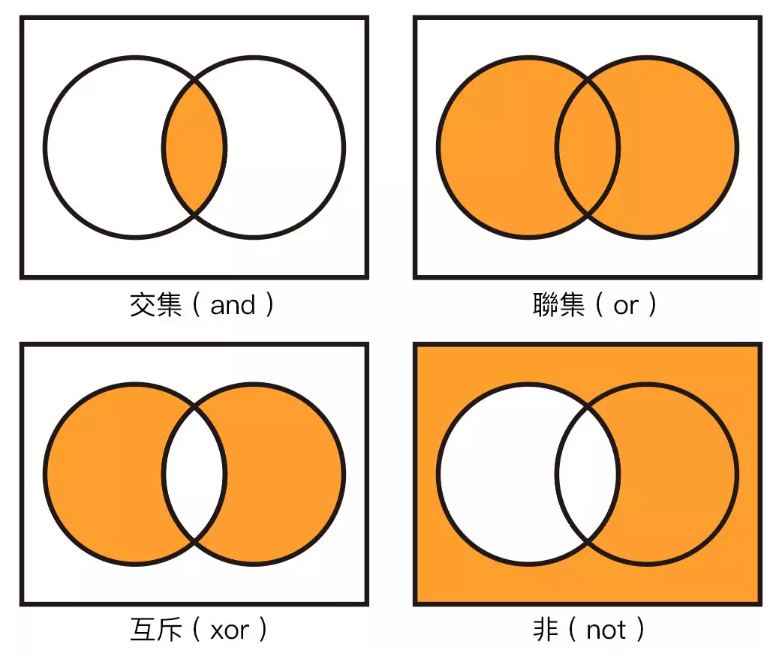

##### bitwise_and() 交集 
使用 OpenCV 的 bitwise_and() 方法，可以將兩張影像的像素顏色，進行「交集」運算，使用方法如下：

In [ ]:
cv2.bitwise_and(img1, img2, mask)
# img1 第一張圖
# img2 第二張圖
# mask 遮罩影像 ( 非必須 )

下方的例子，會將兩張圖片以交集的方式，組合成一張新的圖片 ( ffff00 和 00ffff 的交集是 00ff00 綠色 )。

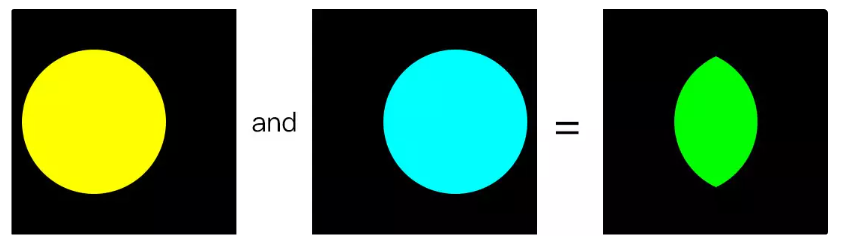

In [ ]:
import cv2
img1 = cv2.imread('test1.png')
img2 = cv2.imread('test2.png')
output = cv2.bitwise_and(img1, img2)  # 使用 bitwise_and
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)                        # 按下任意鍵停止
cv2.destroyAllWindows()

##### bitwise_or() 聯集 
使用 OpenCV 的 bitwise_or() 方法，可以將兩張影像的像素顏色，進行「聯集」運算，使用方法如下：


In [ ]:
cv2.bitwise_or(img1, img2, mask)
# img1 第一張圖
# img2 第二張圖
# mask 遮罩影像 ( 非必須 )

下方的例子，會將兩張圖片以聯集的方式，組合成一張新的圖片 ( ffff00 和 00ffff 的聯集是 ffffff 白色 )。

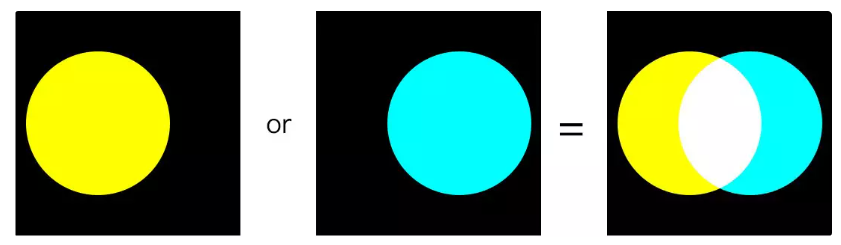

In [ ]:
import cv2
img1 = cv2.imread('test1.png')
img2 = cv2.imread('test2.png')
output = cv2.bitwise_or(img1, img2)  # 使用 bitwise_or
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### bitwise_xor() 差集 
使用 OpenCV 的 bitwise_xor() 方法，可以將兩張影像的像素顏色，進行「差集」運算，使用方法如下：

In [ ]:
cv2.bitwise_or(img1, img2, mask)
# img1 第一張圖
# img2 第二張圖
# mask 遮罩影像 ( 非必須 )

下方的例子，會將兩張圖片以差集的方式，組合成一張新的圖片 ( ffff00 和 00ffff 的差集是 ff00ff 洋紅色 )。

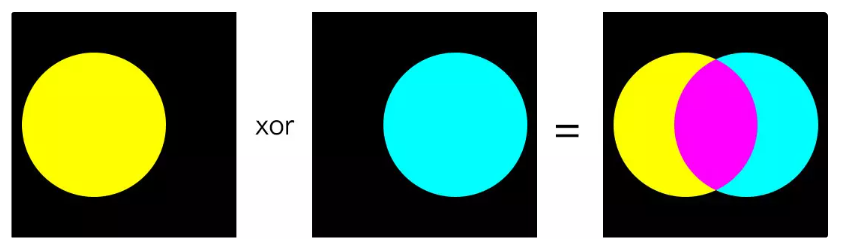

In [ ]:
import cv2
img1 = cv2.imread('test1.png')
img2 = cv2.imread('test2.png')
output = cv2.bitwise_xor(img1, img2)  # 使用 bitwise_xor
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### bitwise_not() 非 
使用 OpenCV 的 bitwise_xor() 方法，可以將影像進行「非」( 相反 ) 運算，使用方法如下：

cv2.bitwise_or(img)
# img 來源圖片
# mask 遮罩影像 ( 非必須 )

下方的例子，會將圖片以「非」的方式，變成一張新的圖片 ( ffff00 的非為 0000ff，周圍 000000 的非為 ffffff )。

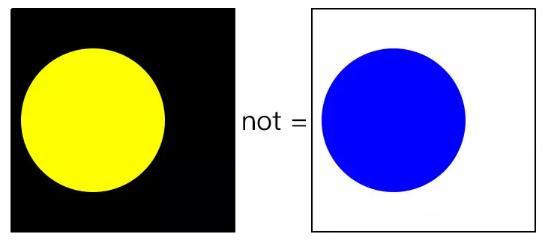

In [ ]:
import cv2
img1 = cv2.imread('test1.png')
output = cv2.bitwise_not(img1)  # 使用 bitwise_not
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)
cv2.destroyAllWindows()S

##### 使用 mask 參數 
上述的四種操作方法中，都有一個非必填的 mask 參數，這個參數可以提供影像一個灰階的「遮罩圖片」，\
圖片中黑色表示透明，白色表示不透明，下方的例子加入了 mask 參數，最後產生的圖片就會只留下中間長方形的部分。

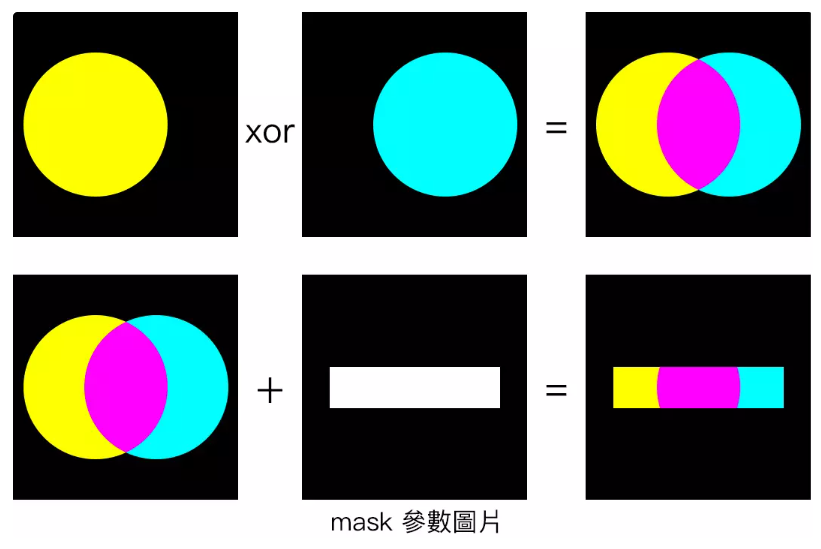

In [ ]:
import cv2
img1 = cv2.imread('test1.png')
img2 = cv2.imread('test2.png')
mask = cv2.imread('mask.png')                    # 遮罩圖片
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)    # 轉換成灰階模式
output = cv2.bitwise_xor(img1, img2, mask=mask)  # 加入 mask 參數
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 圖片去背與合成 
了解遮罩的原理後，就可以將 OpenCV 的 logo 圖片進行去背，並將去背的圖片與另外一張圖片合成，完整步驟如下圖所示：

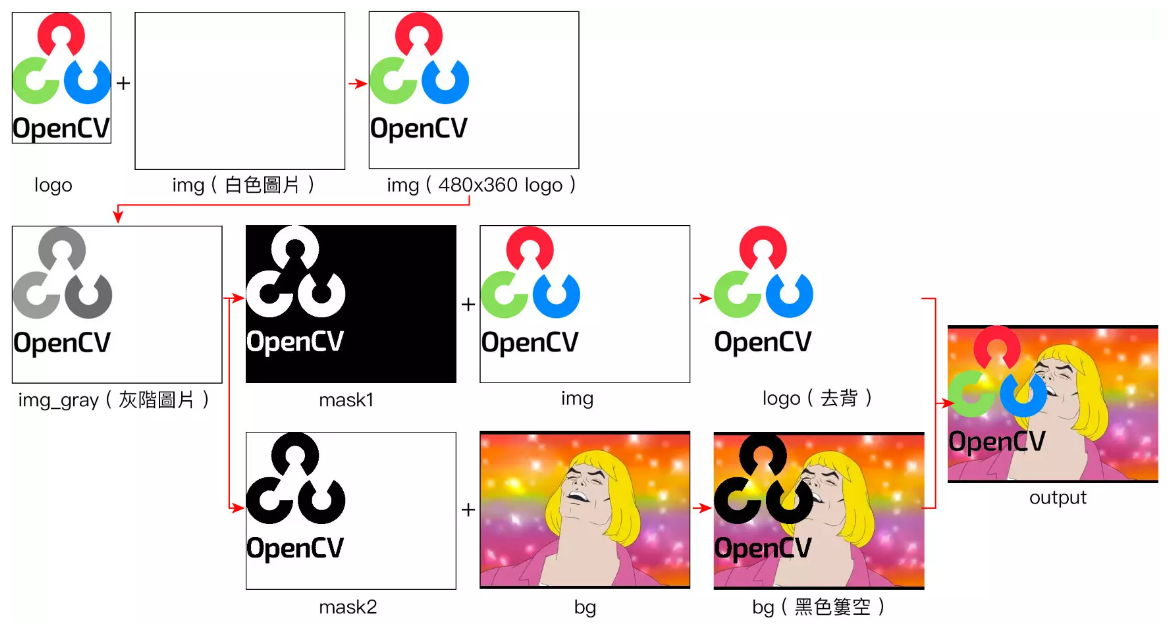


參考步驟，撰寫對應的程式碼，執行後就會看見去背的 logo 圖片和背景圖和成為新的圖片。

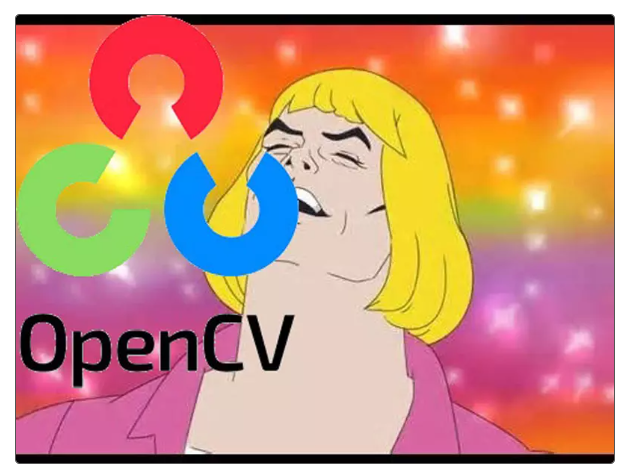

In [ ]:
import cv2
import numpy as np

logo = cv2.imread('logo.jpg')                    # 讀取 OpenCV 的 logo
size = logo.shape                                # 讀取 logo 的長寬尺寸

img = np.zeros((360,480,3), dtype='uint8')       # 產生一張 480x360 背景全黑的圖
img[0:360, 0:480] = '255'                        # 將圖片變成白色 ( 配合 logo 是白色底 )
img[0:size[0], 0:size[1]] = logo                 # 將圖片的指定區域，換成 logo 的圖案
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 產生一張灰階的圖片作為遮罩使用
ret, mask1  = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)  # 使用二值化的方法，產生黑白遮罩圖片
logo = cv2.bitwise_and(img, img, mask = mask1 )  # logo 套用遮罩

bg = cv2.imread('meme.jpg')                      # 讀取底圖
ret, mask2  = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)      # 使用二值化的方法，產生黑白遮罩圖片
bg = cv2.bitwise_and(bg, bg, mask = mask2 )      # 底圖套用遮罩

output = cv2.add(bg, logo)                       # 使用 add 方法將底圖和 logo 合併
cv2.imshow('oxxostudio', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 影片的遮罩效果 
延伸「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」文章的範例，套用遮罩的效果，就能即時將攝影機拍攝的影片加上遮罩效果。

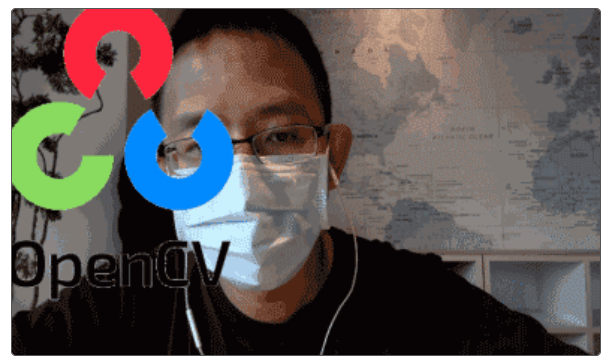

In [ ]:
import cv2
import numpy as np

logo = cv2.imread('logo.jpg')
size = logo.shape
img = np.zeros((360,600,3), dtype='uint8')
img[0:360, 0:600] = '255'
img[0:size[0], 0:size[1]] = logo
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask1  = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)
logo = cv2.bitwise_and(img, img, mask = mask1 )
ret, mask2  = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    frame = cv2.resize(frame,(600, 360))   # 調整圖片尺寸
    bg = cv2.bitwise_and(frame, frame, mask = mask2 )
    output = cv2.add(bg, logo)
    cv2.imshow('oxxostudio', output)
    if cv2.waitKey(1) == ord('q'):
        break      # 按下 q 鍵停止
cap.release()
cv2.destroyAllWindows()

熟悉原理後，將程式碼做一些變化，就能變成影片套用 logo 遮罩，logo 簍空的部分才會出現影片。

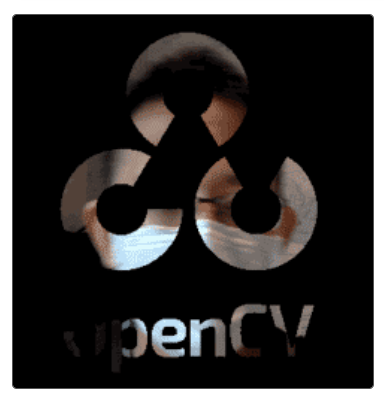

In [ ]:
import cv2
import numpy as np

logo = cv2.imread('logo.jpg')
size = logo.shape
img = np.zeros((360,600,3), dtype='uint8')
img[0:360, 0:600] = '255'
img[30:30+size[0], 155:155+size[1]] = logo         # 將 logo 置中
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, mask1  = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    frame = cv2.resize(frame,(600, 360))
    output = cv2.bitwise_not(frame, mask = mask1 )      # 套用 not 和遮罩
    output = cv2.bitwise_not(output, mask = mask1 )     # 再次套用 not 和遮罩，將色彩轉成原來的顏色
    cv2.imshow('oxxostudio', output)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()